In [1]:
%matplotlib inline
from IPython.display import Image
import pandas as pd
import numpy as np

# Python for Data Analysis

One of the biggest selling points of **Python** is how easy it is to work with data. 

The **Python** ecosystem includes many useful packages to quickly, easily and powerfully work with various forms of data. 

**References:**
1. http://pandas.pydata.org/pandas-docs/stable/dsintro.html
1. http://quant-econ.net/py/pandas.html
1. http://pandas.pydata.org/pandas-docs/stable/10min.html
1. http://pandas.pydata.org/pandas-docs/stable/tutorials.html

**For Interested Students** 

An Excellent Resource is the book "Python for Data Analysis", by Wes McKinney

## Series and DataFrame Objects

Many examples are taken from: http://pandas.pydata.org/pandas-docs/stable/dsintro.html

The two **primary** data objects in Pandas are:

1. Series
2. DataFrames

DataFrames can be thought of as a collection of Series. Selecting a column in a DataFrame will return a Series Object.

The **key** thing to keep in mind:

> data alignment is intrinsic. The link between labels and data will not be broken unless done so explicitly by you.

### Series

**Series** is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the index which can include Index or MultiIndex objects

```
s = pd.Series(data, index=index)
```

data can take many different forms (i.e. dict, ndarray, lists, scalar etc)

#### From Numpy Arrays

In [2]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])

In [3]:
type(s)

pandas.core.series.Series

In [4]:
s

a    0.980283
b    0.601595
c    0.450932
d    0.161590
e    0.473488
dtype: float64

In [5]:
s.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [6]:
#-No Index Specified then will default to a numeric index-#
s = pd.Series(np.random.randn(5))

In [7]:
s

0   -0.266650
1    1.768364
2   -0.791690
3   -0.328366
4   -0.466869
dtype: float64

#### From Dictionaries

In [8]:
d = {'a' : 0., 'b' : 1., 'c' : 2.}
pd.Series(d)

a    0.0
b    1.0
c    2.0
dtype: float64

In [9]:
#-Data Alignment is Intrinsic!-#
pd.Series(d, index=['b', 'c', 'd', 'a'])

b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64

#### Series Objects are Similar to Array Behaviour

In [10]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])

In [11]:
s

a   -0.957224
b   -1.363918
c   -2.158259
d    1.826697
e    2.790229
dtype: float64

In [12]:
s[0]

-0.95722371146902552

In [13]:
s[1:3]

b   -1.363918
c   -2.158259
dtype: float64

In [14]:
s[s > s.median()]

d    1.826697
e    2.790229
dtype: float64

In [15]:
s[[3,2,1]]

d    1.826697
c   -2.158259
b   -1.363918
dtype: float64

**Typically** they are very flexible

In [16]:
np.sum(s)

0.13752607971521114

In [17]:
s.sum()

0.13752607971521114

#### Indexing via the index can be done through the `ix` operator (more important for DataFrames)

In [18]:
s.ix[['d','e']]

d    1.826697
e    2.790229
dtype: float64

**but** becuase they are Series Objects we can also use them like dictionaries to get access to the data. **Don't** confuse this with DataFrame Objects

In [19]:
s[['d','e']]

d    1.826697
e    2.790229
dtype: float64

#### Operations on Series Objects

In [20]:
s + s

a   -1.914447
b   -2.727836
c   -4.316517
d    3.653394
e    5.580458
dtype: float64

In [21]:
s * 2

a   -1.914447
b   -2.727836
c   -4.316517
d    3.653394
e    5.580458
dtype: float64

In [22]:
np.sqrt(s)

/home/mmcky/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


a         NaN
b         NaN
c         NaN
d    1.351554
e    1.670398
dtype: float64

A **key** difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without giving consideration to whether the Series involved have the same labels.

In [23]:
s[2:]                  #No A,B

c   -2.158259
d    1.826697
e    2.790229
dtype: float64

In [24]:
s[:-2]                  #No D,E

a   -0.957224
b   -1.363918
c   -2.158259
dtype: float64

In [25]:
s[2:] + s[:-2]         #Intrinsic Alignment, Union of Index Values

a         NaN
b         NaN
c   -4.316517
d         NaN
e         NaN
dtype: float64

#### Useful Built In Methods

In [26]:
s.describe()

count    5.000000
mean     0.027505
std      2.153662
min     -2.158259
25%     -1.363918
50%     -0.957224
75%      1.826697
max      2.790229
dtype: float64

-----------------------------------------------------------------------

### DataFrame

Reference: http://pandas.pydata.org/pandas-docs/stable/dsintro.html#DataFrame

**DataFrame** is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. **It is generally the most commonly used pandas object**. Like Series, DataFrame accepts many different kinds of input:

1. Dict of 1D ndarrays, lists, dicts, or Series
1. 2-D numpy.ndarray
1. Structured or record ndarray
1. A Series
1. Another DataFrame

Along with the data, you can optionally pass index (row labels) and columns (column labels) arguments.

**Note:** DataFrames have become a standard in the Python ecosystem and can be used with a lot of packages such as **statsmodels**, **scikit-learn** ...

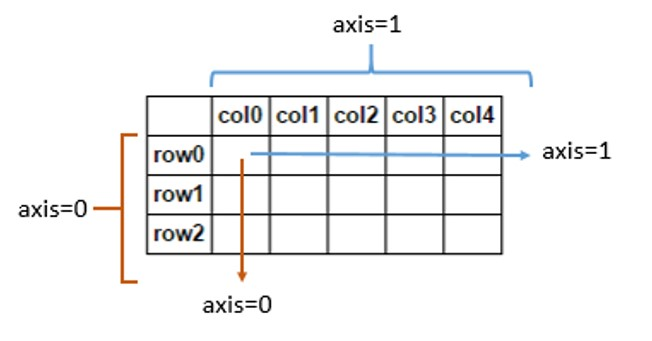

In [28]:
Image(filename='dataframe.jpg')

In [29]:
d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
     'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
df = pd.DataFrame(d)

In [30]:
df          #-Automatic Alignment of Series based on Index-#

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [31]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [32]:
df.columns

Index(['one', 'two'], dtype='object')

#### Accessing Columns

In [33]:
df['one']

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [34]:
type(df['one'])

pandas.core.series.Series

#### Accessing Rows

In [35]:
df.ix['b']

one    2.0
two    2.0
Name: b, dtype: float64

In [36]:
type(df.ix['b'])

pandas.core.series.Series

#### Adding Rows

In [37]:
df['three'] = df['one'] + df['two']

In [38]:
df

,one,two,three
a,1.0,1.0,2.0
b,2.0,2.0,4.0
c,3.0,3.0,6.0
d,NaN,4.0,NaN


#### Selecting Multiple Columns

In [39]:
df[['one','three']]

,one,three
a,1.0,2.0
b,2.0,4.0
c,3.0,6.0
d,NaN,NaN


#### Selecting Multiple Rows

In [40]:
df.ix[['b','c']]

,one,two,three
b,2.0,2.0,4.0
c,3.0,3.0,6.0


#### Inserting Scalars

In [41]:
df['four'] = "What"   #Fill the Column

In [42]:
df

,one,two,three,four
a,1.0,1.0,2.0,What
b,2.0,2.0,4.0,What
c,3.0,3.0,6.0,What
d,NaN,4.0,NaN,What


#### Deleting a Column

In [43]:
del df['four']

In [44]:
df

,one,two,three
a,1.0,1.0,2.0
b,2.0,2.0,4.0
c,3.0,3.0,6.0
d,NaN,4.0,NaN


#### Transposing

In [45]:
df.T

,a,b,c,d
one,1.0,2.0,3.0,NaN
two,1.0,2.0,3.0,4.0
three,2.0,4.0,6.0,NaN


In [46]:
df.transpose()

,a,b,c,d
one,1.0,2.0,3.0,NaN
two,1.0,2.0,3.0,4.0
three,2.0,4.0,6.0,NaN


In [47]:
df              #Note: The underlying object hasn't changed due to no assignment

,one,two,three
a,1.0,1.0,2.0
b,2.0,2.0,4.0
c,3.0,3.0,6.0
d,NaN,4.0,NaN


## Index Objects and Reshaping

In [48]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                    'B' : ['A', 'B', 'C'] * 4,
                    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                    'D' : np.random.randn(12),
                    'E' : np.random.randn(12)})

In [49]:
df

,A,B,C,D,E
0,one,A,foo,0.509813,1.100929
1,one,B,foo,-0.472732,0.165025
2,two,C,foo,1.014933,-0.109177
3,three,A,bar,-2.414185,-0.491749
4,one,B,bar,-1.005903,1.027069
5,one,C,bar,-1.551419,-0.950883
6,two,A,foo,-0.426452,1.723995
7,three,B,foo,0.308518,-0.546022
8,one,C,foo,-0.764407,0.563812
9,one,A,bar,0.358590,-0.199776


In [50]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.358590  0.509813
      B -1.005903 -0.472732
      C -1.551419 -0.764407
three A -2.414185       NaN
      B       NaN  0.308518
      C  1.095836       NaN
two   A       NaN -0.426452
      B  1.557234       NaN
      C       NaN  1.014933

**Using MultiIndex** to reorganize the information in a DataFrame

In [51]:
dfi = df.set_index(['A','B','C'])

In [52]:
dfi.unstack(level='C')

D                   E          
C             bar       foo       bar       foo
A     B                                        
one   A  0.358590  0.509813 -0.199776  1.100929
      B -1.005903 -0.472732  1.027069  0.165025
      C -1.551419 -0.764407 -0.950883  0.563812
three A -2.414185       NaN -0.491749       NaN
      B       NaN  0.308518       NaN -0.546022
      C  1.095836       NaN -0.149773       NaN
two   A       NaN -0.426452       NaN  1.723995
      B  1.557234       NaN  0.468958       NaN
      C       NaN  1.014933       NaN -0.109177

In [53]:
dfi['D'].unstack(level='C')

C             bar       foo
A     B                    
one   A  0.358590  0.509813
      B -1.005903 -0.472732
      C -1.551419 -0.764407
three A -2.414185       NaN
      B       NaN  0.308518
      C  1.095836       NaN
two   A       NaN -0.426452
      B  1.557234       NaN
      C       NaN  1.014933

#### Comparison of DataFrame Objects

In [54]:
#-Compare-#
df1 = dfi['D'].unstack(level='C')
df2 = pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

In [55]:
df1.equals(df2)

True

## Sorting

In [56]:
s = pd.Series(range(4), index=['d','a','b','c'])

In [57]:
s

d    0
a    1
b    2
c    3
dtype: int64

In [58]:
s.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

In [59]:
df = pd.DataFrame(np.arange(8).reshape((2,4)), index=['three','one'], columns=['d','a','b','c'])

In [60]:
df

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


In [61]:
df.sort_index()

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [62]:
df.sort_index(axis=1)        #Columns

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [63]:
df.sort_values(by='a')

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


#### Chain Operations Together

In [64]:
df.sort_index(axis=1).sort_values(by='a', ascending=False)

,a,b,c,d
one,5,6,7,4
three,1,2,3,0


**Note:** Using a MultiIndex you can also sort by levels in the index

### Ranking

In [65]:
df = df.T

In [66]:
df

,three,one
d,0,4
a,1,5
b,2,6
c,3,7


In [67]:
df.rank()

,three,one
d,1.0,1.0
a,2.0,2.0
b,3.0,3.0
c,4.0,4.0


-----------------------------------------------------------------------

## Split-Apply-Combine

DataFrames also support more advanced operations such as **groupby**  which can be very powerful when aggregating data based on groups and performing some operations over them

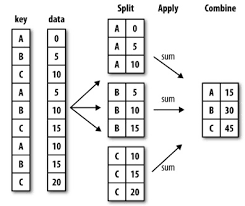

In [69]:
Image(filename='split-apply-combine.png')

In [70]:
key = ['A','B','C','A','B','C','A','B','C']
data = [0,5,10,5,10,15,10,15,20]
df = pd.DataFrame(data, index=key, columns=['data'])

In [71]:
df

,data
A,0
B,5
C,10
A,5
B,10
C,15
A,10
B,15
C,20


In [72]:
#-Groupby Index Level-#
df.groupby(level=0).sum()

,data
A,15
B,30
C,45


In [73]:
df = df.reset_index()
df.columns=["key","data"]
df.groupby(by=["key"]).sum()

,data
key,
A,15
B,30
C,45


## Working with Special Types of Data

**Pandas** has a support for different types of data such as:

1. Time Series
1. Categoricals (very recently)

Reference: http://pandas.pydata.org/pandas-docs/stable/10min.html

In [74]:
rng = pd.date_range('1/1/2012', periods=200, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [75]:
ts.head()

2012-01-01 00:00:00    195
2012-01-01 00:00:01    263
2012-01-01 00:00:02    188
2012-01-01 00:00:03     65
2012-01-01 00:00:04    391
Freq: S, dtype: int64

In [76]:
ts.tail()

2012-01-01 00:03:15    191
2012-01-01 00:03:16     80
2012-01-01 00:03:17    240
2012-01-01 00:03:18    244
2012-01-01 00:03:19     25
Freq: S, dtype: int64

#### Resampling the Time Series

In [77]:
ts.resample('1Min')

DatetimeIndexResampler [freq=<Minute>, axis=0, closed=left, label=left, convention=start, base=0]

In [79]:
ts.resample('1Min').mean()

2012-01-01 00:00:00    264.033333
2012-01-01 00:01:00    231.066667
2012-01-01 00:02:00    254.016667
2012-01-01 00:03:00    230.150000
Freq: T, dtype: float64

In [80]:
ts.resample('1Min').sum()

2012-01-01 00:00:00    15842
2012-01-01 00:01:00    13864
2012-01-01 00:02:00    15241
2012-01-01 00:03:00     4603
Freq: T, dtype: int64

#### Working with Time Series Data

**See:** pandas-explore-fred-data.ipynb as an example of working with real world data

Let's work with some random generated data)

In [81]:
s = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/1990', periods=1000))

In [82]:
s.head()

1990-01-01   -1.693114
1990-01-02    2.238251
1990-01-03    0.181793
1990-01-04   -0.279104
1990-01-05    0.916099
Freq: D, dtype: float64

In [83]:
s.tail()

1992-09-22   -1.564441
1992-09-23   -0.386878
1992-09-24    0.672355
1992-09-25    0.657477
1992-09-26   -1.650981
Freq: D, dtype: float64

In [84]:
len(s)

1000

In [85]:
s = s.cumsum()      #Generate a cumulative sum

In [87]:
r = s.rolling(window=60, center=True).mean()
#Note: r = s.rolling(window=60) [As of Pandas version 0.18]

In [88]:
data = pd.DataFrame({'s' : s, 'r' : r})

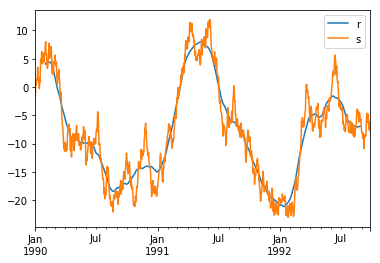

In [89]:
data.plot()

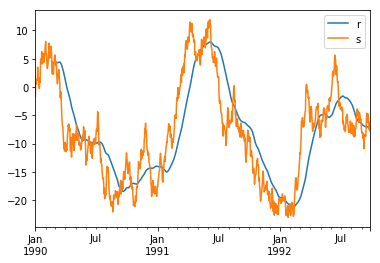

In [90]:
r = s.rolling(60).mean()
#Note: r = s.rolling(window=60) [As of Pandas version 0.18]
data = pd.DataFrame({'s' : s, 'r' : r})
data.plot()

-----------------------------------------------------------------------

## Example: Working with the World Development Indicators

This example demonstrates how you can start to work with Excel files using the World Development Indicators


In [92]:
%matplotlib inline
from pandas.io.excel import ExcelFile
import matplotlib.pyplot as plt
fl = "data/ae0545d9-7b57-4c37-9db1-91859e7bd5c3_v2.xls"
gov_debt_xls = ExcelFile(fl)
govt_debt = gov_debt_xls.parse('Data', index_col=1, na_values=['NA'], skiprows=3)

In [93]:
govt_debt

,Country Name,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country Code,,,,,,,,,,,,,,,,,,,,,
ABW,Aruba,"Central government debt, total (% of GDP)",GC.DOD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AND,Andorra,"Central government debt, total (% of GDP)",GC.DOD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AFG,Afghanistan,"Central government debt, total (% of GDP)",GC.DOD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGO,Angola,"Central government debt, total (% of GDP)",GC.DOD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALB,Albania,"Central government debt, total (% of GDP)",GC.DOD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ARB,Arab World,"Central government debt, total (% of GDP)",GC.DOD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ARE,United Arab Emirates,"Central government debt, total (% of GDP)",GC.DOD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.907780,NaN,NaN
ARG,Argentina,"Central government debt, total (% of GDP)",GC.DOD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ARM,Armenia,"Central government debt, total (% of GDP)",GC.DOD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
#-<< Run Through Steps Below Here >>-#

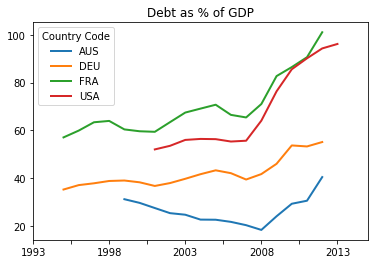

In [94]:
# == Take desired values and plot == #
data = govt_debt.transpose()
data = data[['AUS', 'DEU', 'FRA', 'USA']]  #Select Countries
data = data[36:]  #Select Years
data.plot(lw=2, title='Debt as % of GDP')
plt.show()

========================================================================

## Medium Sized DataSets (International Trade)

Some problems start to become large and may demand working with more sophisticated tools such as **pandas**. Very large problems require data management tools such as SQL, NoSQL, and Graph based Datasets; but a large number of problems are in between: not small enough for Excel and manual manipulation, but annoyingly small to have to learn database management. **Pandas** sits in this space nicely as a spreadsheet type abstraction that is scalable. Pandas is focused on **in-memory** datasets (i.e. datasets that can fit into RAM)

Let's consider Product Level International Exports data for the world economy.

**Files Required:**
Go to http://atlas.media.mit.edu/en/resources/data/ and download
1. SITC4 Rev. 2 (1962 to 2013) - "Product Trade between Origin and Destination Country by Year (bilateral)"
2. "Country Names"
3. "SITC Revision 2 Product Names"


In [95]:
export = "data/year_origin_sitc_rev2.tsv"
cname = "data/country_names.tsv"
pname = "data/products_sitc_rev2.tsv"

In [96]:
export = pd.read_csv(export, sep='\t')
cname = pd.read_csv(cname, sep='\t')
pname = pd.read_csv(pname, sep='\t')

FileNotFoundError: File b'data/year_origin_sitc_rev2.tsv' does not exist

#### Let's take look at the data

In [93]:
export.head()

,year,origin,sitc_rev2,export_val,import_val,export_rca,import_rca
0,1962,afg,230,4000,2000,0.013854,NaN
1,1962,afg,250,66000,0,0.384611,NaN
2,1962,afg,540,74000,0,2.358660,NaN
3,1962,afg,545,17000,0,0.074049,NaN
4,1962,afg,548,33000,0,0.691940,NaN


In [94]:
cname.head()

,id,id_3char,name
0,afago,ago,Angola
1,afbdi,bdi,Burundi
2,afben,ben,Benin
3,afbfa,bfa,Burkina Faso
4,afbwa,bwa,Botswana


In [95]:
pname.head()

,id,sitc,name
0,105722,5722,Initiating Devices
1,105838,5838,Polymerization Ion Exchangers
2,106250,6250,"Rubber tires, tire cases, inner and flaps, for..."
3,106251,6251,Car Tires
4,106280,6280,Other articles of rubber


In [96]:
#-Memory Usage-#
export.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5002928 entries, 0 to 5002927
Data columns (total 7 columns):
year          int64
origin        object
sitc_rev2     int64
export_val    float64
import_val    float64
export_rca    float64
import_rca    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 305.4+ MB


#### Let's Focus on the Export Data

In [97]:
export.head()

,year,origin,sitc_rev2,export_val,import_val,export_rca,import_rca
0,1962,afg,230,4000,2000,0.013854,NaN
1,1962,afg,250,66000,0,0.384611,NaN
2,1962,afg,540,74000,0,2.358660,NaN
3,1962,afg,545,17000,0,0.074049,NaN
4,1962,afg,548,33000,0,0.691940,NaN


In [98]:
export.shape

(5002928, 7)

In [99]:
export.describe()

,year,sitc_rev2,export_val,import_val,export_rca,import_rca
count,5002928.000000,5002928.000000,4.918819e+06,4.999516e+06,4918819.000000,3950609.000000
mean,1993.513410,5548.390583,4.548178e+07,4.458144e+07,2.593615,1.616125
std,13.116049,2673.359200,7.879395e+08,7.787933e+08,87.795506,21.995977
min,1962.000000,10.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1985.000000,2929.000000,0.000000e+00,4.456700e+04,0.000000,0.130933
50%,1995.000000,6553.000000,3.672900e+04,6.300000e+05,0.035696,0.522320
75%,2004.000000,7435.000000,1.670977e+06,6.331729e+06,0.443627,1.307450
max,2013.000000,9710.000000,3.052372e+11,3.366875e+11,81664.200000,21594.500000


**Warning:** Be careful with how the data is represented when it is imported. SITC revision 2 codes are typically 4 digits long, that incorporate leading zeros. When working with data always take time to inspect your data

In [100]:
export = "data/year_origin_sitc_rev2.tsv"
export = pd.read_csv(export, sep='\t', converters={'sitc_rev2':str})

pname = "data/products_sitc_rev2.tsv"
pname = pd.read_csv(pname, sep='\t', converters={'sitc':str})

In [101]:
export.head()

,year,origin,sitc_rev2,export_val,import_val,export_rca,import_rca
0,1962,afg,0230,4000,2000,0.013854,NaN
1,1962,afg,0250,66000,0,0.384611,NaN
2,1962,afg,0540,74000,0,2.358660,NaN
3,1962,afg,0545,17000,0,0.074049,NaN
4,1962,afg,0548,33000,0,0.691940,NaN


In [102]:
export.describe()

,year,export_val,import_val,export_rca,import_rca
count,5002928.000000,4.918819e+06,4.999516e+06,4918819.000000,3950609.000000
mean,1993.513410,4.548178e+07,4.458144e+07,2.593615,1.616125
std,13.116049,7.879395e+08,7.787933e+08,87.795506,21.995977
min,1962.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1985.000000,0.000000e+00,4.456700e+04,0.000000,0.130933
50%,1995.000000,3.672900e+04,6.300000e+05,0.035696,0.522320
75%,2004.000000,1.670977e+06,6.331729e+06,0.443627,1.307450
max,2013.000000,3.052372e+11,3.366875e+11,81664.200000,21594.500000


In [103]:
export.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5002928 entries, 0 to 5002927
Data columns (total 7 columns):
year          int64
origin        object
sitc_rev2     object
export_val    float64
import_val    float64
export_rca    float64
import_rca    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 305.4+ MB


In [104]:
#-Compute Number of Countries-#
export['origin'].drop_duplicates().size

250

In [105]:
#-Compute Number of Years-#
export['year'].drop_duplicates().size

52

In [106]:
#-Compute Number of Products-#
export['sitc_rev2'].drop_duplicates().size

986

### Compute RCA Values

We can use this Data to Compute a Measure of Comparative Advantage for:
1. 250 Countries
1. 52 Years, and
1. 986 Prodoucts


Let's use the standard Balassa definition of Revealed Comparative Advantage (RCA)

$$
RCA_{cpt} =\frac{E_{cpt}}{E_{ct}} / \frac{E_{pt}}{E_t}
$$

**Reference:** Balassa, B. (1965), Trade Liberalisation and Revealed Comparative Advantage, The Manchester School, 33, 99-123.


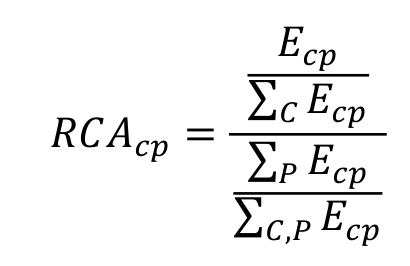

In [107]:
#-Using Summation-#
Image("./rca-balassa.png")

In [108]:
data = export[["year","origin","sitc_rev2","export_val","export_rca"]]

In [109]:
data.head()

,year,origin,sitc_rev2,export_val,export_rca
0,1962,afg,0230,4000,0.013854
1,1962,afg,0250,66000,0.384611
2,1962,afg,0540,74000,2.358660
3,1962,afg,0545,17000,0.074049
4,1962,afg,0548,33000,0.691940


In [110]:
cntry_total = data.groupby(by=["year","origin"]).sum()[["export_val"]]
cntry_total.columns=['ctotal']
product_total = data.groupby(by=["year","sitc_rev2"]).sum()[["export_val"]]
product_total.columns=['ptotal']
world_total = data.groupby(by=["year"]).sum()[["export_val"]]
world_total.columns=['wtotal']

In [111]:
cntry_total.head()

ctotal
year origin            
1962 afg       86135000
     ago      119458000
     alb        2688000
     are           2000
     arg     1430519000

In [112]:
product_total.head()

ptotal
year sitc_rev2           
1962 0010         1776000
     0011       478649000
     0012        44891000
     0013        67317000
     0014        25580000

In [113]:
world_total.head()

,wtotal
year,
1962,1.437881e+11
1963,1.588631e+11
1964,1.796778e+11
1965,1.962422e+11
1966,2.167287e+11


In [114]:
data = data.merge(cntry_total.reset_index(), on=["year","origin"])

In [115]:
data.head()

,year,origin,sitc_rev2,export_val,export_rca,ctotal
0,1962,afg,0230,4000,0.013854,86135000
1,1962,afg,0250,66000,0.384611,86135000
2,1962,afg,0540,74000,2.358660,86135000
3,1962,afg,0545,17000,0.074049,86135000
4,1962,afg,0548,33000,0.691940,86135000


In [116]:
#-Check what these Operations have Done-#
data[data.origin == 'afg'][["year","origin","ctotal"]].drop_duplicates().head()

,year,origin,ctotal
0,1962,afg,86135000
36223,1963,afg,105038000
74727,1964,afg,84797000
113808,1965,afg,91223000
154163,1966,afg,114601000


In [117]:
data = data.merge(product_total.reset_index(), on=["year","sitc_rev2"])
data = data.merge(world_total.reset_index(), on=["year"])

In [118]:
data.head()

,year,origin,sitc_rev2,export_val,export_rca,ctotal,ptotal,wtotal
0,1962,afg,0230,4000,0.013854,86135000,438674000,1.437881e+11
1,1962,arg,0230,7162000,1.493650,1430519000,438674000,1.437881e+11
2,1962,aus,0230,66077000,9.519820,2070759000,438674000,1.437881e+11
3,1962,aut,0230,3071000,0.953014,961366000,438674000,1.437881e+11
4,1962,bel,0230,4802000,0.348457,4111319000,438674000,1.437881e+11


In [119]:
data["computed_rca"] = (data["export_val"]/data["ctotal"])/(data["ptotal"]/data["wtotal"])

In [120]:
data["diff"] = data["export_rca"] - data["computed_rca"]

In [121]:
data.head()

,year,origin,sitc_rev2,export_val,export_rca,ctotal,ptotal,wtotal,computed_rca,diff
0,1962,afg,0230,4000,0.013854,86135000,438674000,1.437881e+11,0.015222,-0.001367
1,1962,arg,0230,7162000,1.493650,1430519000,438674000,1.437881e+11,1.641050,-0.147400
2,1962,aus,0230,66077000,9.519820,2070759000,438674000,1.437881e+11,10.459280,-0.939460
3,1962,aut,0230,3071000,0.953014,961366000,438674000,1.437881e+11,1.047061,-0.094047
4,1962,bel,0230,4802000,0.348457,4111319000,438674000,1.437881e+11,0.382844,-0.034387


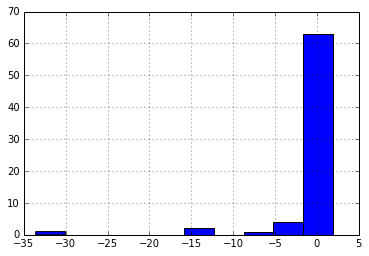

In [122]:
#-Let's check How different the Computed Numbers are for Afghanistan-#
%matplotlib inline
data[(data.year==1962) & (data.origin=="afg")]['diff'].hist()

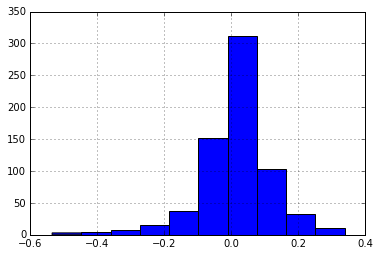

In [123]:
#-USA-#
data[(data.year==1962) & (data.origin=="usa")]['diff'].hist()

=========================================================================

## Web Data

Let's consider a practical and everyday type of problem. Say we want to collect some data from a web site that has some embedded tables. Let's make use of the PyPI package index and check out the search results for `economics`.

1. https://pypi.python.org/pypi
2. Search `economics`
3. Check the structure of the web link (https://pypi.python.org/pypi?%3Aaction=search&term=economics&submit=search)

In [97]:
#-Web Data and Web Scraping-#

import pandas as pd
import requests

url = "https://pypi.python.org/pypi?%3Aaction=search&term=economics&submit=search"
page = requests.get(url)

In [125]:
#page.      #-Explore the Object, This is a Representation of a Web Page-#

In [98]:
page.text

'<?xml version="1.0" encoding="utf-8"?>\n<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n\n  <html xmlns="http://www.w3.org/1999/xhtml" lang="en" xml:lang="en">\n    <head>\n      \n      <meta content="text/html; charset=utf-8" http-equiv="content-type"/>\n      <title>Index of Packages Matching \'economics\' : Python Package Index</title>\n      <meta content="python programming language object oriented web free source package index download software"/>\n      <meta content="The Python Package Index is a repository of software for the Python programming language."/>\n       <link rel="alternate" type="application/rss+xml" title="RSS: 40 latest updates" href="https://pypi.python.org/pypi?:action=rss"/>\n       <link rel="alternate" type="application/rss+xml" title="RSS: 40 newest packages" href="https://pypi.python.org/pypi?:action=packages_rss"/>\n       <link rel="stylesheet" media="screen" href="/static/styl

In [99]:
table = pd.read_html(page.text)

In [100]:
table[0]

,0,1,2
0,Package,Weight*,Description
1,economics 0.1.2,11,Functions and data manipulation for economics ...
2,tradingeconomics 0.2.73,10,Library to download data from Trading Economic...
3,trytond_health_socioeconomics 3.0.8,6,GNU Health Socioeconomics Module
4,econometrics 0.1.,4,Python economics library
5,pymaclab 0.95.9,4,The Python Macroeconomics Laboratory
6,cashflows 0.1.6,3,Investment modeling and advanced engineering e...
7,inflation_calc 0.2.1,3,Functions and data manipulation for economics ...
8,sfc_models 0.4.3,3,Stock-Flow Consistent (SFC) model generation
9,bls 0.1.1,2,A library to access Bureau of Labor Statistics...


In [101]:
#-Use Infered Header Information-#
table = pd.read_html(page.text, header=0)[0]

In [102]:
#-Nicely Formatted Table-#
table

,Package,Weight*,Description
0,economics 0.1.2,11.0,Functions and data manipulation for economics ...
1,tradingeconomics 0.2.73,10.0,Library to download data from Trading Economic...
2,trytond_health_socioeconomics 3.0.8,6.0,GNU Health Socioeconomics Module
3,econometrics 0.1.,4.0,Python economics library
4,pymaclab 0.95.9,4.0,The Python Macroeconomics Laboratory
5,cashflows 0.1.6,3.0,Investment modeling and advanced engineering e...
6,inflation_calc 0.2.1,3.0,Functions and data manipulation for economics ...
7,sfc_models 0.4.3,3.0,Stock-Flow Consistent (SFC) model generation
8,bls 0.1.1,2.0,A library to access Bureau of Labor Statistics...
9,dismalpy 0.2.3,2.0,DismalPy: a collection of resources for quanti...


In [103]:
#-Final Code-#
url = "https://pypi.python.org/pypi?%3Aaction=search&term=economics&submit=search"
page = requests.get(url)
table = pd.read_html(page.text, header=0)[0]

In [104]:
table

,Package,Weight*,Description
0,economics 0.1.2,11.0,Functions and data manipulation for economics ...
1,tradingeconomics 0.2.73,10.0,Library to download data from Trading Economic...
2,trytond_health_socioeconomics 3.0.8,6.0,GNU Health Socioeconomics Module
3,econometrics 0.1.,4.0,Python economics library
4,pymaclab 0.95.9,4.0,The Python Macroeconomics Laboratory
5,cashflows 0.1.6,3.0,Investment modeling and advanced engineering e...
6,inflation_calc 0.2.1,3.0,Functions and data manipulation for economics ...
7,sfc_models 0.4.3,3.0,Stock-Flow Consistent (SFC) model generation
8,bls 0.1.1,2.0,A library to access Bureau of Labor Statistics...
9,dismalpy 0.2.3,2.0,DismalPy: a collection of resources for quanti...


**Next**

Let's say we would like the names and version numbers to be contained in different columns?

http://pandas.pydata.org/pandas-docs/stable/text.html

In [105]:
table["Name"] = table.Package.str.split().str.get(0)
table["Version"] = table.Package.str.split().str.get(1)

In [106]:
#-Let's Order the table by Specifying some Variables, and getting rid of the old Package Name-#
table = table[["Name","Version","Weight*","Description"]]

In [107]:
table.drop_duplicates(subset=["Name"])

,Name,Version,Weight*,Description
0,economics,0.1.2,11.0,Functions and data manipulation for economics ...
1,tradingeconomics,0.2.73,10.0,Library to download data from Trading Economic...
2,trytond_health_socioeconomics,3.0.8,6.0,GNU Health Socioeconomics Module
3,econometrics,0.1.,4.0,Python economics library
4,pymaclab,0.95.9,4.0,The Python Macroeconomics Laboratory
5,cashflows,0.1.6,3.0,Investment modeling and advanced engineering e...
6,inflation_calc,0.2.1,3.0,Functions and data manipulation for economics ...
7,sfc_models,0.4.3,3.0,Stock-Flow Consistent (SFC) model generation
8,bls,0.1.1,2.0,A library to access Bureau of Labor Statistics...
9,dismalpy,0.2.3,2.0,DismalPy: a collection of resources for quanti...


**Next:**

Let's now consider we would like to know the Packages for `economics`, `biology`, `engineering`, `chemistry`. 
We have done all of the hard work with exploring the dataframe - we can now simply package what we have learnt into a loop

In [108]:
results = {}
search = ["economics", "biology","chemistry","engineering"]
for term in search:
    print("Checking %s"%term)
    url = "https://pypi.python.org/pypi?%3Aaction=search&term=" +term+"&submit=search"
    page = requests.get(url)
    table = pd.read_html(page.text, header=0)[0]
    table["Name"] = table.Package.str.split().str.get(0)
    table["Version"] = table.Package.str.split().str.get(1)
    table = table[["Name","Version","Weight*","Description"]]
    table = table.drop_duplicates(subset=["Name"])
    results[term] = table

Checking economics
Checking biology
Checking chemistry
Checking engineering


In [109]:
results['economics']

,Name,Version,Weight*,Description
0,economics,0.1.2,11.0,Functions and data manipulation for economics ...
1,tradingeconomics,0.2.73,10.0,Library to download data from Trading Economic...
2,trytond_health_socioeconomics,3.0.8,6.0,GNU Health Socioeconomics Module
3,econometrics,0.1.,4.0,Python economics library
4,pymaclab,0.95.9,4.0,The Python Macroeconomics Laboratory
5,cashflows,0.1.6,3.0,Investment modeling and advanced engineering e...
6,inflation_calc,0.2.1,3.0,Functions and data manipulation for economics ...
7,sfc_models,0.4.3,3.0,Stock-Flow Consistent (SFC) model generation
8,bls,0.1.1,2.0,A library to access Bureau of Labor Statistics...
9,dismalpy,0.2.3,2.0,DismalPy: a collection of resources for quanti...


In [110]:
results['biology']

,Name,Version,Weight*,Description
0,pydvkbiology,0.44,8.0,Python scripts used in my biology/bioinformati...
1,pySBOL,2.2.0.post2,5.0,"A module for reading, writing, and constructin..."
2,bones,0.1,4.0,A python toolkit for biology
3,AGEpy,0.5.0,3.0,Bioinformatics tools for Python developed at t...
4,betse,0.5.0,3.0,"BETSE, the Bioelectric Tissue Simulation Engine."
5,buddysuite,1.2.7,3.0,BuddySuite is a collection of command line uti...
6,caspo,3.0.1,3.0,Reasoning on the response of logical signaling...
7,cobrababel,0.1.1,3.0,CobraBabel: COBRA Model Translator
8,concise,0.5.0,3.0,CONCISE (COnvolutional Neural for CIS-regulato...
9,csb,1.2.3,3.0,Computational Structural Biology Toolbox
